# 문제 1
- https://leetcode.com/contest/weekly-contest-321/problems/find-the-pivot-integer/

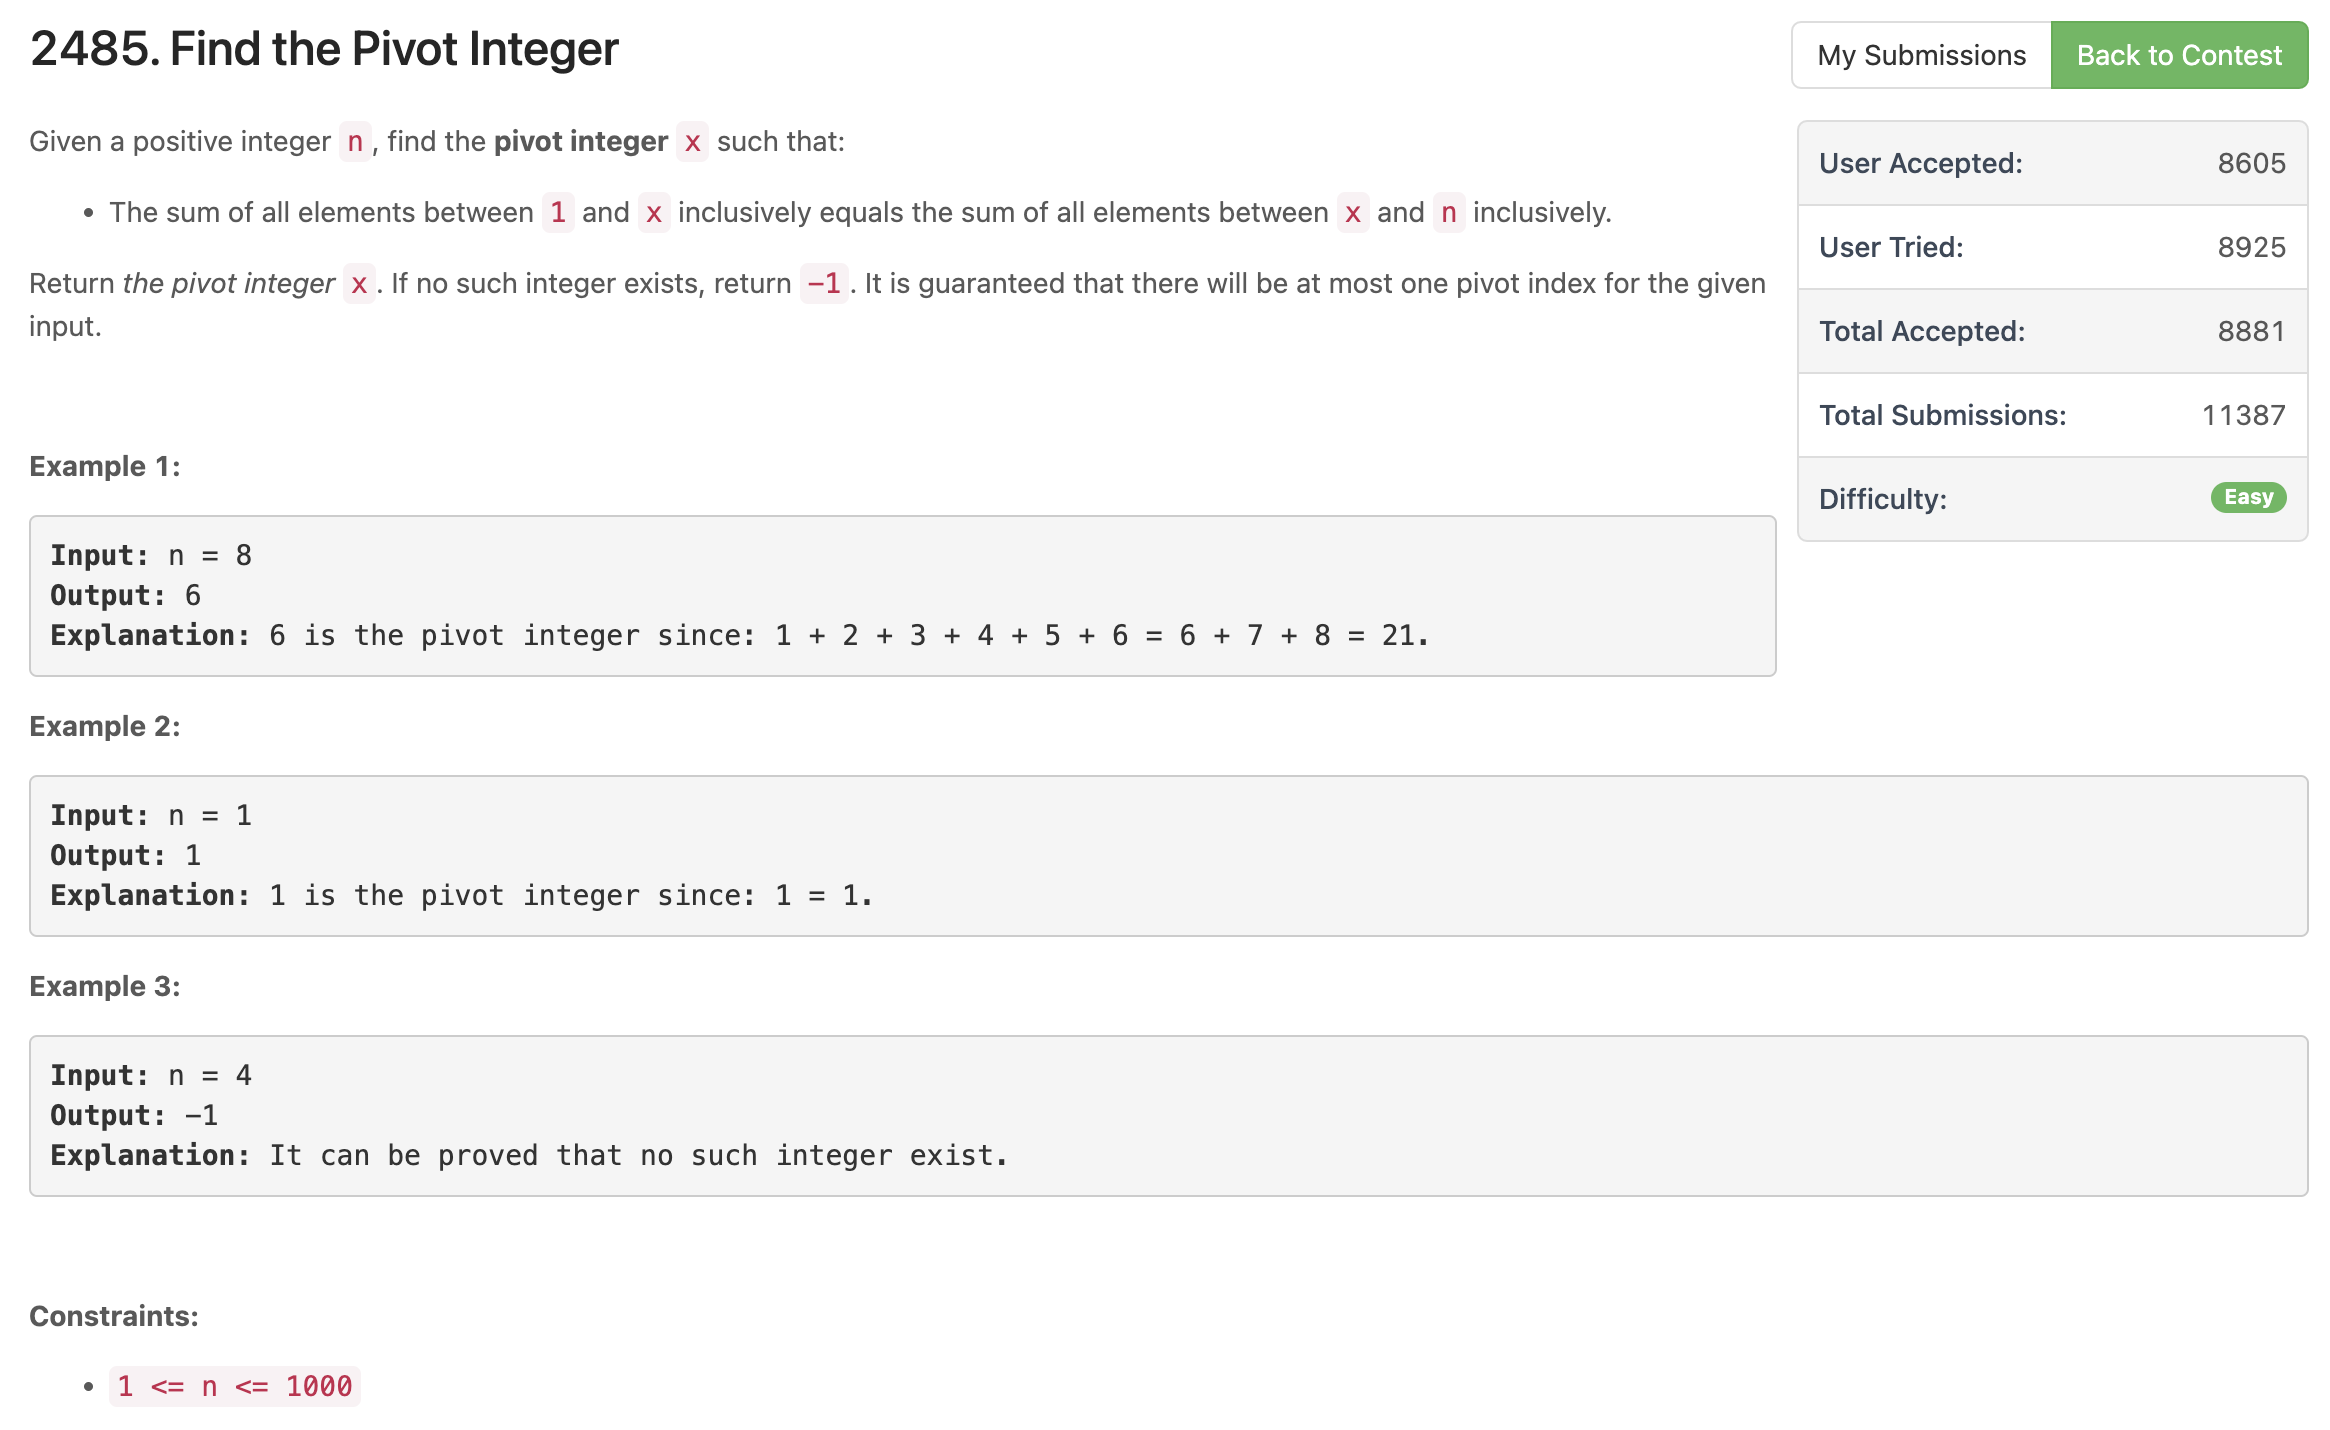

In [ ]:
class Solution:
    def pivotInteger(self, n: int) -> int:
        for t in range(n//2, n+1):
            # print(sum(list(range(1,t+1))))
            # print(sum(list(range(t,n+1))))
            # print('-'*50)
            if sum(list(range(1,t+1))) == sum(list(range(t,n+1))):
                return t
            
            elif sum(list(range(1,t+1))) > sum(list(range(t,n+1))):
                return -1
                
        
        else:
            return -1
            

# 문제 2
- https://leetcode.com/contest/weekly-contest-321/problems/append-characters-to-string-to-make-subsequence/

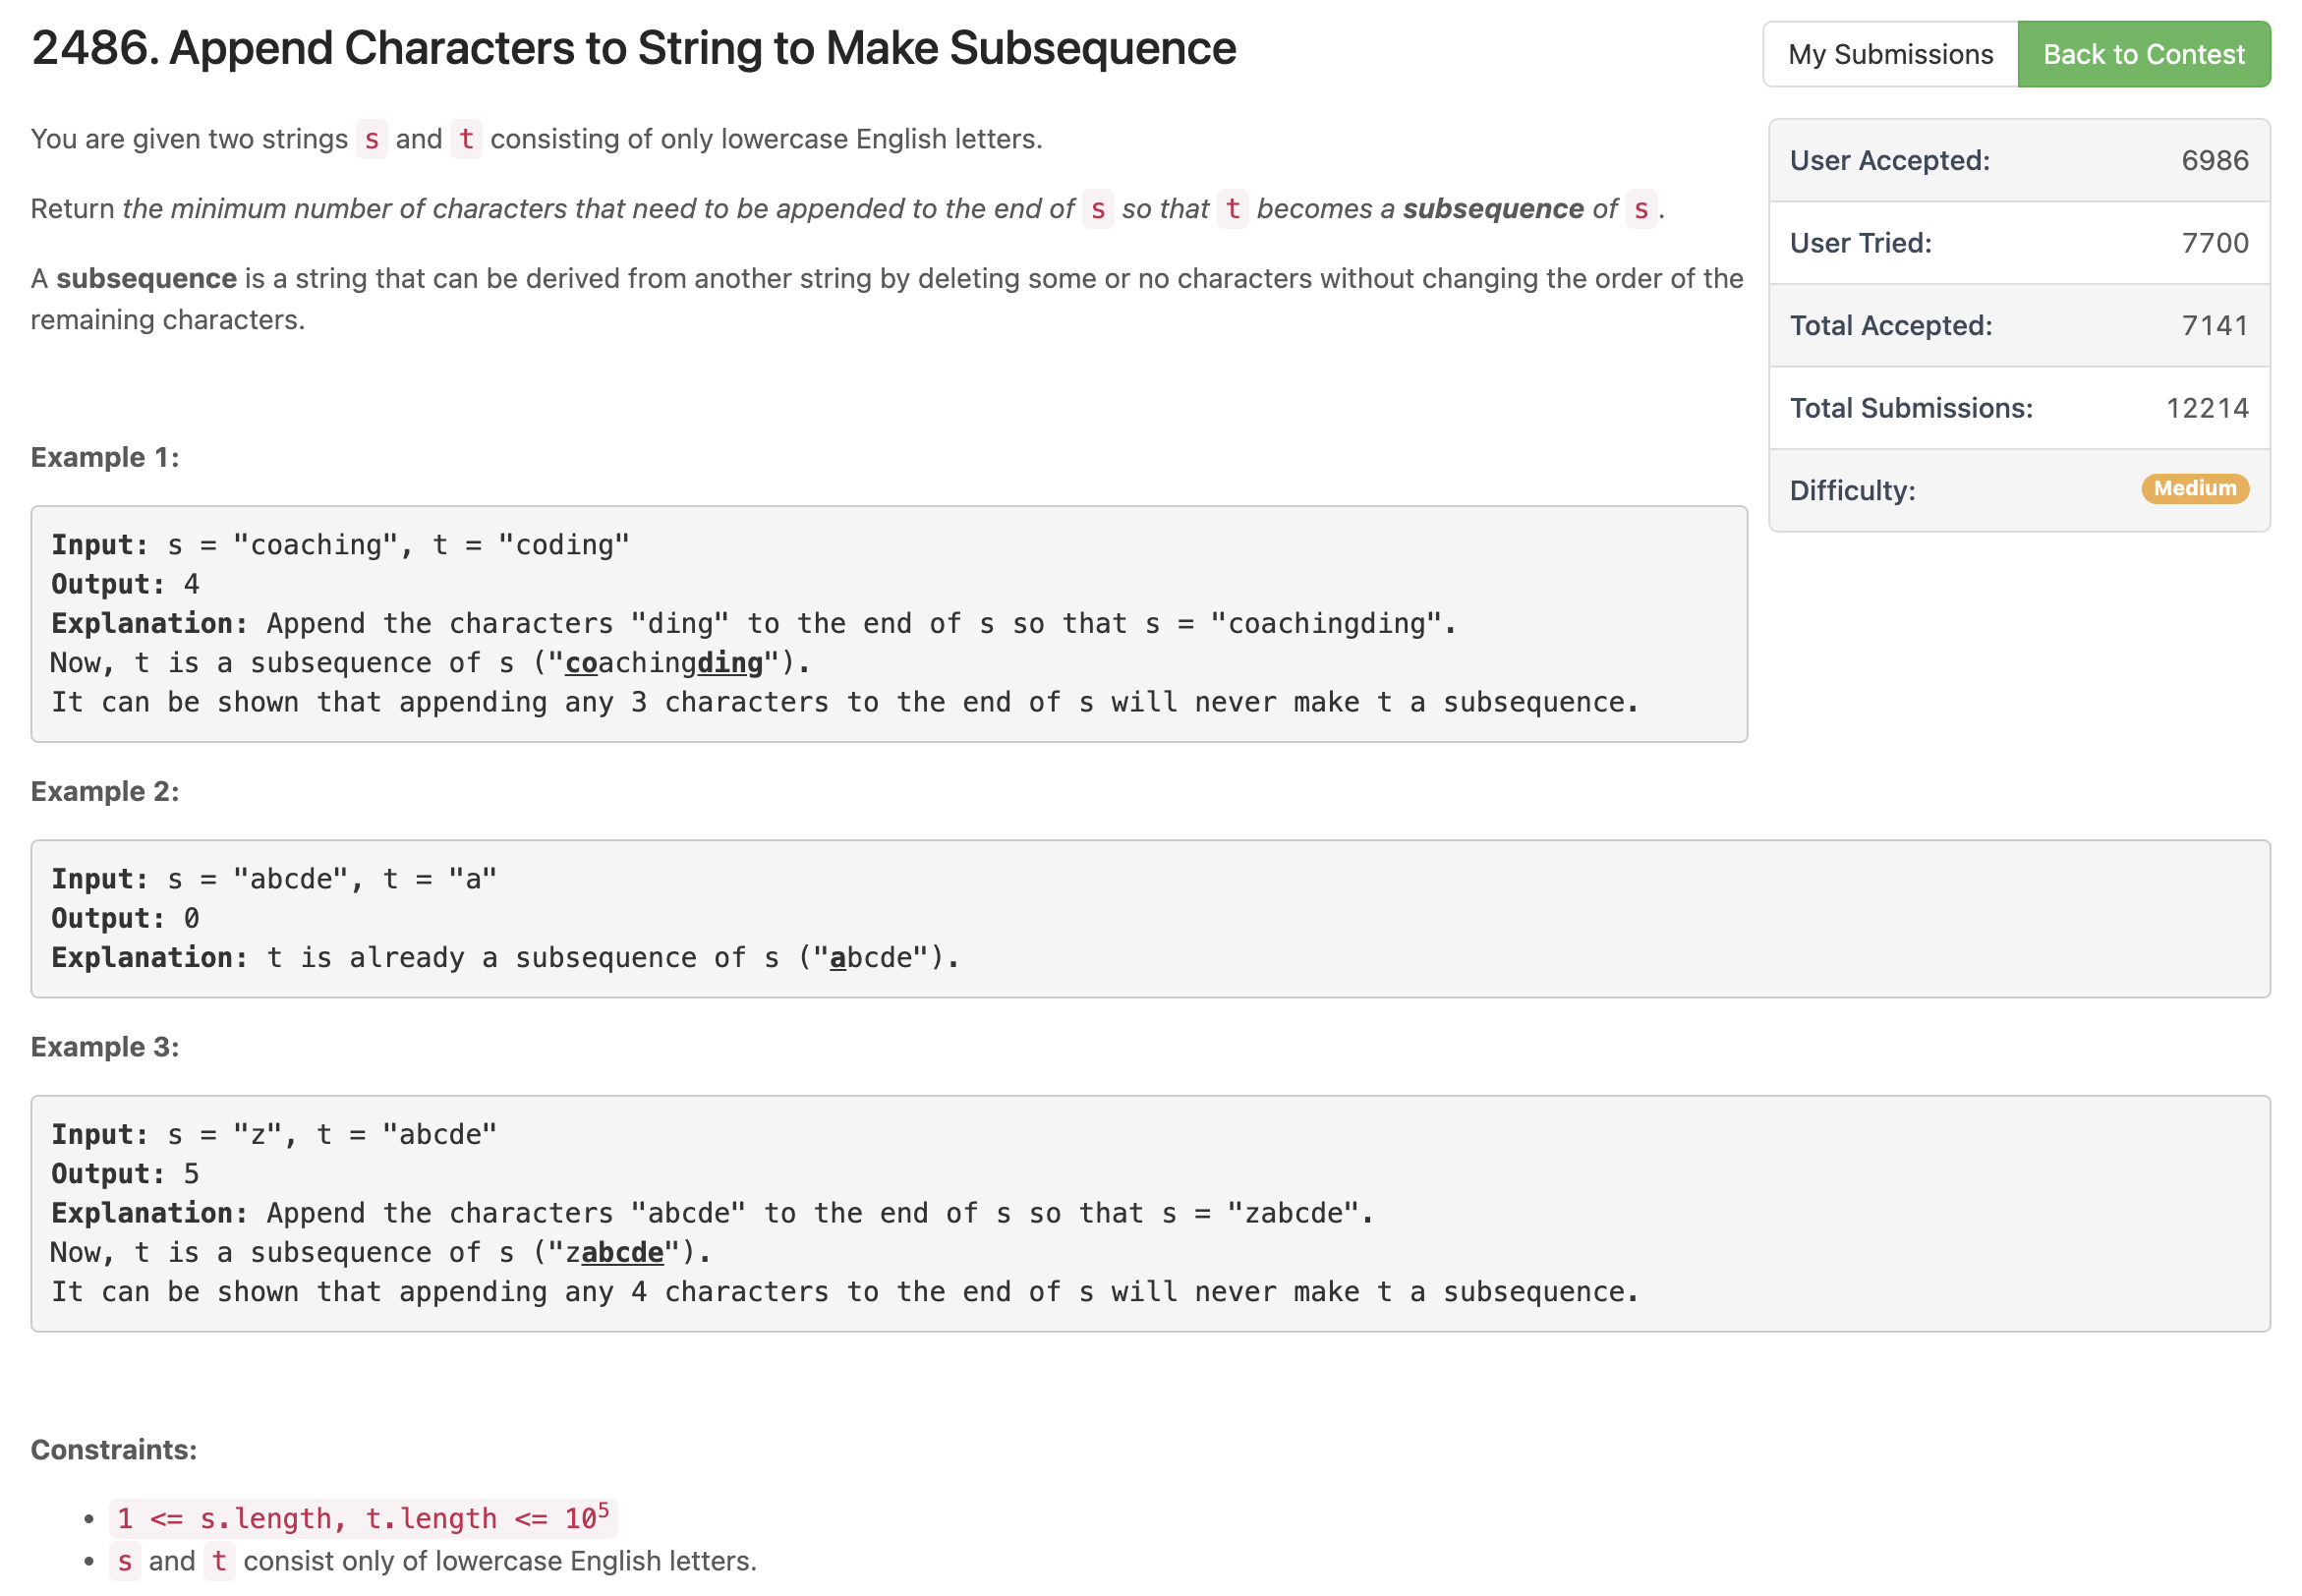

- idea
    - point를 설정한다. (default 0)
    - s의 문자를 하나씩 반복문으로 돌면서 t[point]와 같은 글자인지 비교한다.
        - 만약 같다면 point += 1, 다르면 pass
    - 그렇게 s의 문자들을 반복하면서 돌았을 때 순서대로 t에 몇 개 들어있는지 파악한다.
    - t의 길이에서 point값을 빼주면, 총 몇개를 뒤에 이어 붙여야하는지 확인할 수 있다.

In [12]:
class Solution:
    def appendCharacters(self, s: str, t: str) -> int:
        point = 0
        for c in s:
            if point >= len(t):
                break
            if c == t[point]:
                point += 1
            else:
                continue

        return(len(t) - point)

4

# 문제 3
- https://leetcode.com/contest/weekly-contest-321/problems/remove-nodes-from-linked-list/

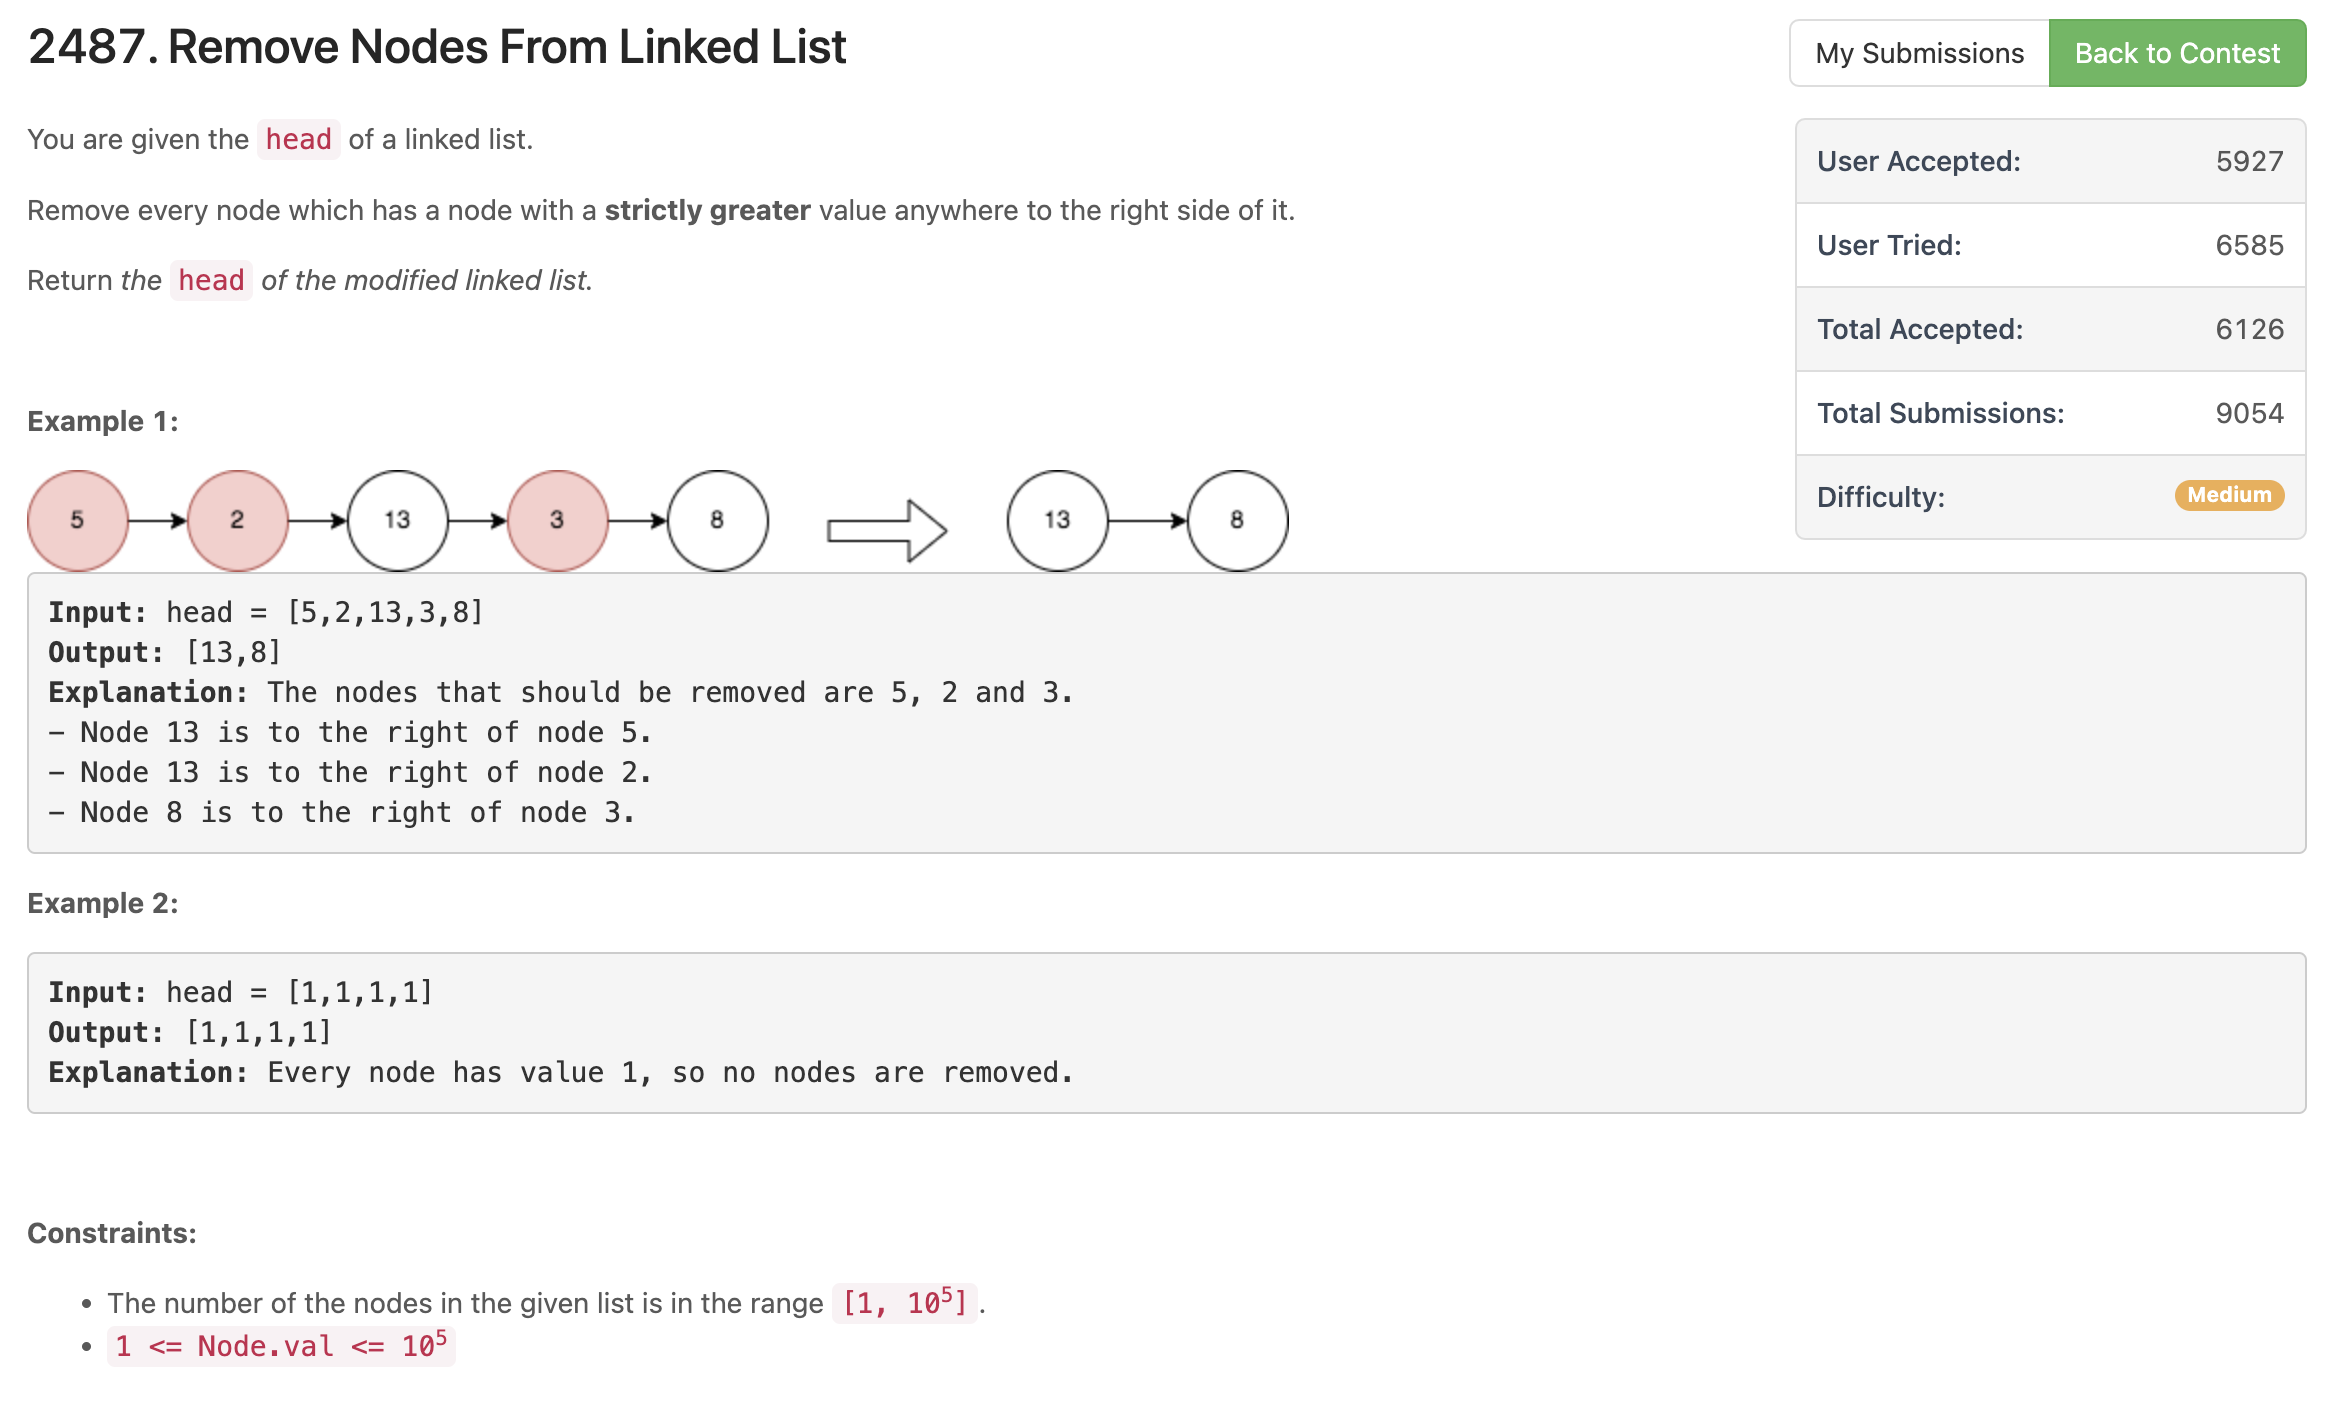

In [13]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next

In [ ]:
class Solution:
    def removeNodes(self, head: Optional[ListNode]) -> Optional[ListNode]:
        answer = []
        # print(head)
        while head:
            val = head.val
            if not head.next:
                answer.append(val)
                break
                
            if val > head.next.val:
                answer.append(val)
            else:
                pass
            head = head.next
        print(answer)
        real_answer= []
        for i in range(len(answer)):
            if i == len(answer)-1:
                real_answer.append(answer[i])
                break
                
            if answer[i] >= answer[i+1]:
                real_answer.append(answer[i])
                
        return real_answer

- 재귀 풀이

In [ ]:
class Solution:
    def removeNodes(self, head: Optional[ListNode]) -> Optional[ListNode]:
        if not head.next:
            return head
        nextNode = self.removeNodes(head.next)
        if head.val < nextNode.val:
            return nextNode
        else:
            head.next = nextNode 
            return head

- stack 이용한 풀이(나랑 비슷)

In [ ]:
class Solution:
    def removeNodes(self, head: Optional[ListNode]) -> Optional[ListNode]:
        stack = []                                          # We have to keep a Monotonic Decreasing Stack
        cur = head        
        while cur:                                         
            while stack and cur.val > stack[-1].val:        #  Loop over List and check if current elem is greater than stack[-1]
                stack.pop()                                 # If it is greater, then we remove that elem from stack.

            stack.append(cur)                               # At the end, we will add the current elem to the stack
            cur = cur.next                                  # Go to next elem in the List
#         print(stack)
        
        dummy = ListNode()                                  # Always a good idea to keep dummy head for LinkedList delete.
        cur = dummy
#         print(cur)
        print('------')
        for node in stack:                                  # Go through each element in stack
            # print(node)
            cur.next = node                                 # We add it to our new LinkedList
            cur = cur.next                                  # Update the current pointer of our LinkList
            
        return dummy.next              